In [192]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

**Data Overview**

This json file from kaggle contains lists of json objects with data on individuals including:
- customer_id
- age
- gender
- annual_income (k$)
- spending_score (1-100)

Converted from csv to json using: https://csvjson.com/csv2json

In [193]:
df = pd.read_json('mall_customers.json')

In [194]:
df.head()

,Age,Annual_Income,CustomerID,Gender,Spending_Score
0,19,15,1,Male,39
1,21,15,2,Male,81
2,20,16,3,Female,6
3,23,16,4,Female,77
4,31,17,5,Female,40


In [195]:
average_income = df['Annual_Income'].mean()

In [196]:
average_income

60.56

In [197]:
#Add new column for incomes above average, which will be a boolean value

df['above_average_income'] = (df['Annual_Income'] - average_income) > 0

In [198]:
#You can review just 1 or more sample of the data to see how it looks

df.sample(5)

,Age,Annual_Income,CustomerID,Gender,Spending_Score,above_average_income
40,65,38,41,Female,35,False
164,50,85,165,Male,26,True
193,38,113,194,Female,91,True
66,43,48,67,Female,50,False
93,40,60,94,Female,40,False


In [199]:
df.to_csv('mall_customers_processed.csv', index=False)

In [200]:
#Using min and max to get the range

min_income_value = df['Annual_Income'].min()

In [201]:
min_income_value

15

In [202]:
max_income_value = df['Annual_Income'].max()

In [203]:
income_range = max_income_value - min_income_value

In [204]:
income_range

122

In [205]:
#Sorting data

income = df['Annual_Income']

In [206]:
income.head()

0    15
1    15
2    16
3    16
4    17
Name: Annual_Income, dtype: int64

In [207]:
sorted_income = income.sort_values().reset_index(drop=True)

In [208]:
sorted_income.head()

0    15
1    15
2    16
3    16
4    17
Name: Annual_Income, dtype: int64

In [209]:
income_mean = income.mean()
income_mean

60.56

In [210]:
income_median = income.median()
income_median

61.5

In [211]:
#this chooses the FIRST of the mode values (otherwise it will give two options)
income_mode = income.mode().values[0]
income_mode

54

In [212]:
#visualize this data using a histogram

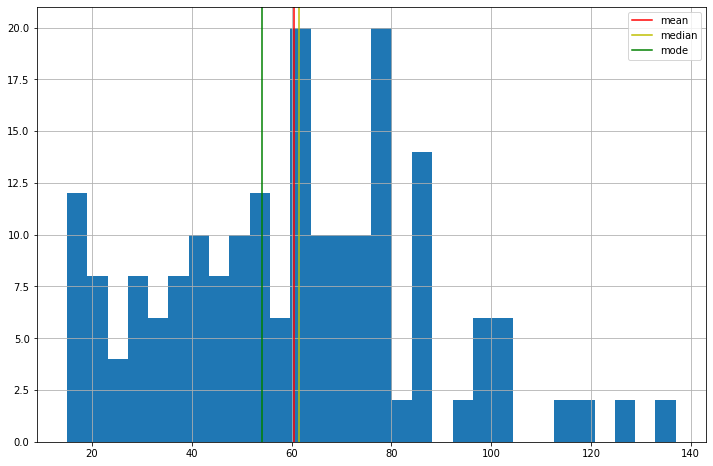

In [213]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

df['Annual_Income'].hist(bins=30)

plt.axvline(income_mean, color='r', label='mean')

plt.axvline(income_median, color='y', label='median')

plt.axvline(income_mode, color='g', label='mode')


plt.legend()

Remembers that the median is much less sensitive to outliers as compared to the mean!

**Review of Interquartile Range**

In [214]:
print(f'Data Shape: {df.shape}')
num_records = df.shape[0]
      
print(f'Number of Records: {num_records}')

Data Shape: (200, 6)
Number of Records: 200


In [215]:
#make a copy of the income data 
income_data = df[['Annual_Income']].copy()

In [216]:
income_data.sample(3)

,Annual_Income
67,48
198,137
63,47


In [217]:
#make a copy of the age data as well
age_data = df[['Age']].copy()
age_data.sample()

,Age
160,56


In [218]:
#set up new columns for calculating cumulatives 

counts = [1] * num_records

income_data['income_counts'] = counts
age_data['age_counts'] = counts

In [219]:
#sort by ascending for the age column
age_data = age_data.sort_values('Age')
age_data.head()

,Age,age_counts
114,18,1
91,18,1
65,18,1
33,18,1
0,19,1


In [220]:
#Use the groupby function to see the cumulative counts for each age group!

age_data = age_data.groupby('Age', as_index = False).count()
age_data.head()

,Age,age_counts
0,18,4
1,19,8
2,20,5
3,21,5
4,22,3


In [225]:
#get a cumulative count of the individual counts of ages. This is used to set up the data for visualizations.

age_data['cumcount_age'] = age_data['age_counts'].cumsum()
age_data.head()

,Age,age_counts,cumcount_age
0,18,4,4
1,19,8,12
2,20,5,17
3,21,5,22
4,22,3,25


In [221]:
#Do the same for the income column! First, sort by ascending for the income column

income_data = income_data.sort_values('Annual_Income')
income_data.head()

,Annual_Income,income_counts
0,15,1
1,15,1
2,16,1
3,16,1
4,17,1


In [222]:
income_data = income_data.groupby('Annual_Income', as_index = False).count()
income_data.head()

,Annual_Income,income_counts
0,15,2
1,16,2
2,17,2
3,18,2
4,19,4


In [227]:
income_data['cumcount_income'] = income_data['income_counts'].cumsum()
income_data.head()

,Annual_Income,income_counts,cumcount_income
0,15,2,2
1,16,2,4
2,17,2,6
3,18,2,8
4,19,4,12


Interquartile Range: